In [11]:
import sim
import scipy
import execute

import read_data as read_data
import numpy as np
from matplotlib import pyplot as plt
import copy
import time
import gui

In [8]:
# Try to do the CSE 199 starting ambulances.

starter = execute.get_starting_set(11, 600)
len(starter)

11

In [9]:
# Data
(calls, allbases, demands, times, calls_latlong) = read_data.populate_data()
allbases = np.delete(np.array(allbases), 2, 1)
demands = np.delete(np.array(demands), 2, 1)
times = np.array(times)
calls_latlong = np.array(calls_latlong)

num_ambulances = 8

In [4]:
times_copy = copy.deepcopy(times)

# Continually get the min cost row (most optimal base)
# Delete the columns that are covered by this base by r1
# Recalculate the total cost for each base
# Repeat

r1 = 600

numbases = 11
list_bases = []
total_covered = []
for x in range(numbases):
    print(np.shape(times_copy))
    covered = []
    row_num = 0
    for row in times_copy:
        count = 0
        for col in row:
            if col < r1:
                count += 1
        covered.append((row_num, count))
        row_num += 1
    
    d = [('index', int), ('covered', int)]
    covered = np.array(covered, d)
    
    min_cost = (np.sort(covered, order='covered', kind='mergesort')[-1])

    list_bases.append(min_cost[0])
    
    # Delete the columns (demands) that are covered by r1.
    
    primary_covered = [times_copy[min_cost[0]][i] < r1 for i in range(len(times_copy[min_cost[0]]))]
    covered_indices = [i for i in range(len(primary_covered)) if primary_covered[i] ]
    total_covered += covered_indices

    times_copy = np.delete(times_copy, covered_indices, axis=1)

ind = list_bases
print("Total Covered: " , len(total_covered))

(969, 100)
(969, 72)
(969, 54)
(969, 38)
(969, 26)
(969, 19)
(969, 15)
(969, 11)
(969, 8)
(969, 6)
(969, 4)
Total Covered:  97


In [5]:
sim.run_through_cases()

Reading data set: ../data/small_datos.csv
case:  1 of 34
case:  2 of 34
case:  3 of 34
case:  4 of 34
case:  5 of 34
case:  6 of 34
case:  7 of 34
case:  8 of 34
case:  9 of 34
case:  10 of 34
case:  11 of 34
case:  12 of 34
case:  13 of 34
case:  14 of 34
case:  15 of 34
case:  16 of 34
case:  17 of 34
case:  18 of 34
case:  19 of 34
case:  20 of 34
case:  21 of 34
case:  22 of 34
case:  23 of 34
case:  24 of 34
case:  25 of 34
case:  26 of 34
case:  27 of 34
case:  28 of 34
case:  29 of 34
case:  30 of 34
case:  31 of 34
case:  32 of 34
case:  33 of 34
case:  34 of 34


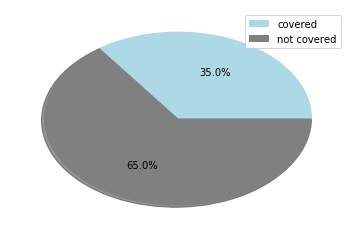

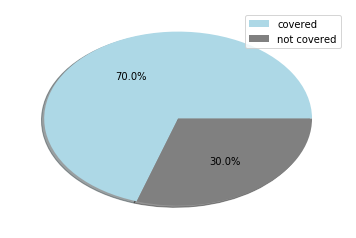

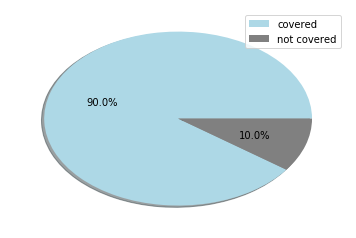

In [12]:
gui.draw_pie(35)
gui.draw_pie(70)
gui.draw_pie(90)